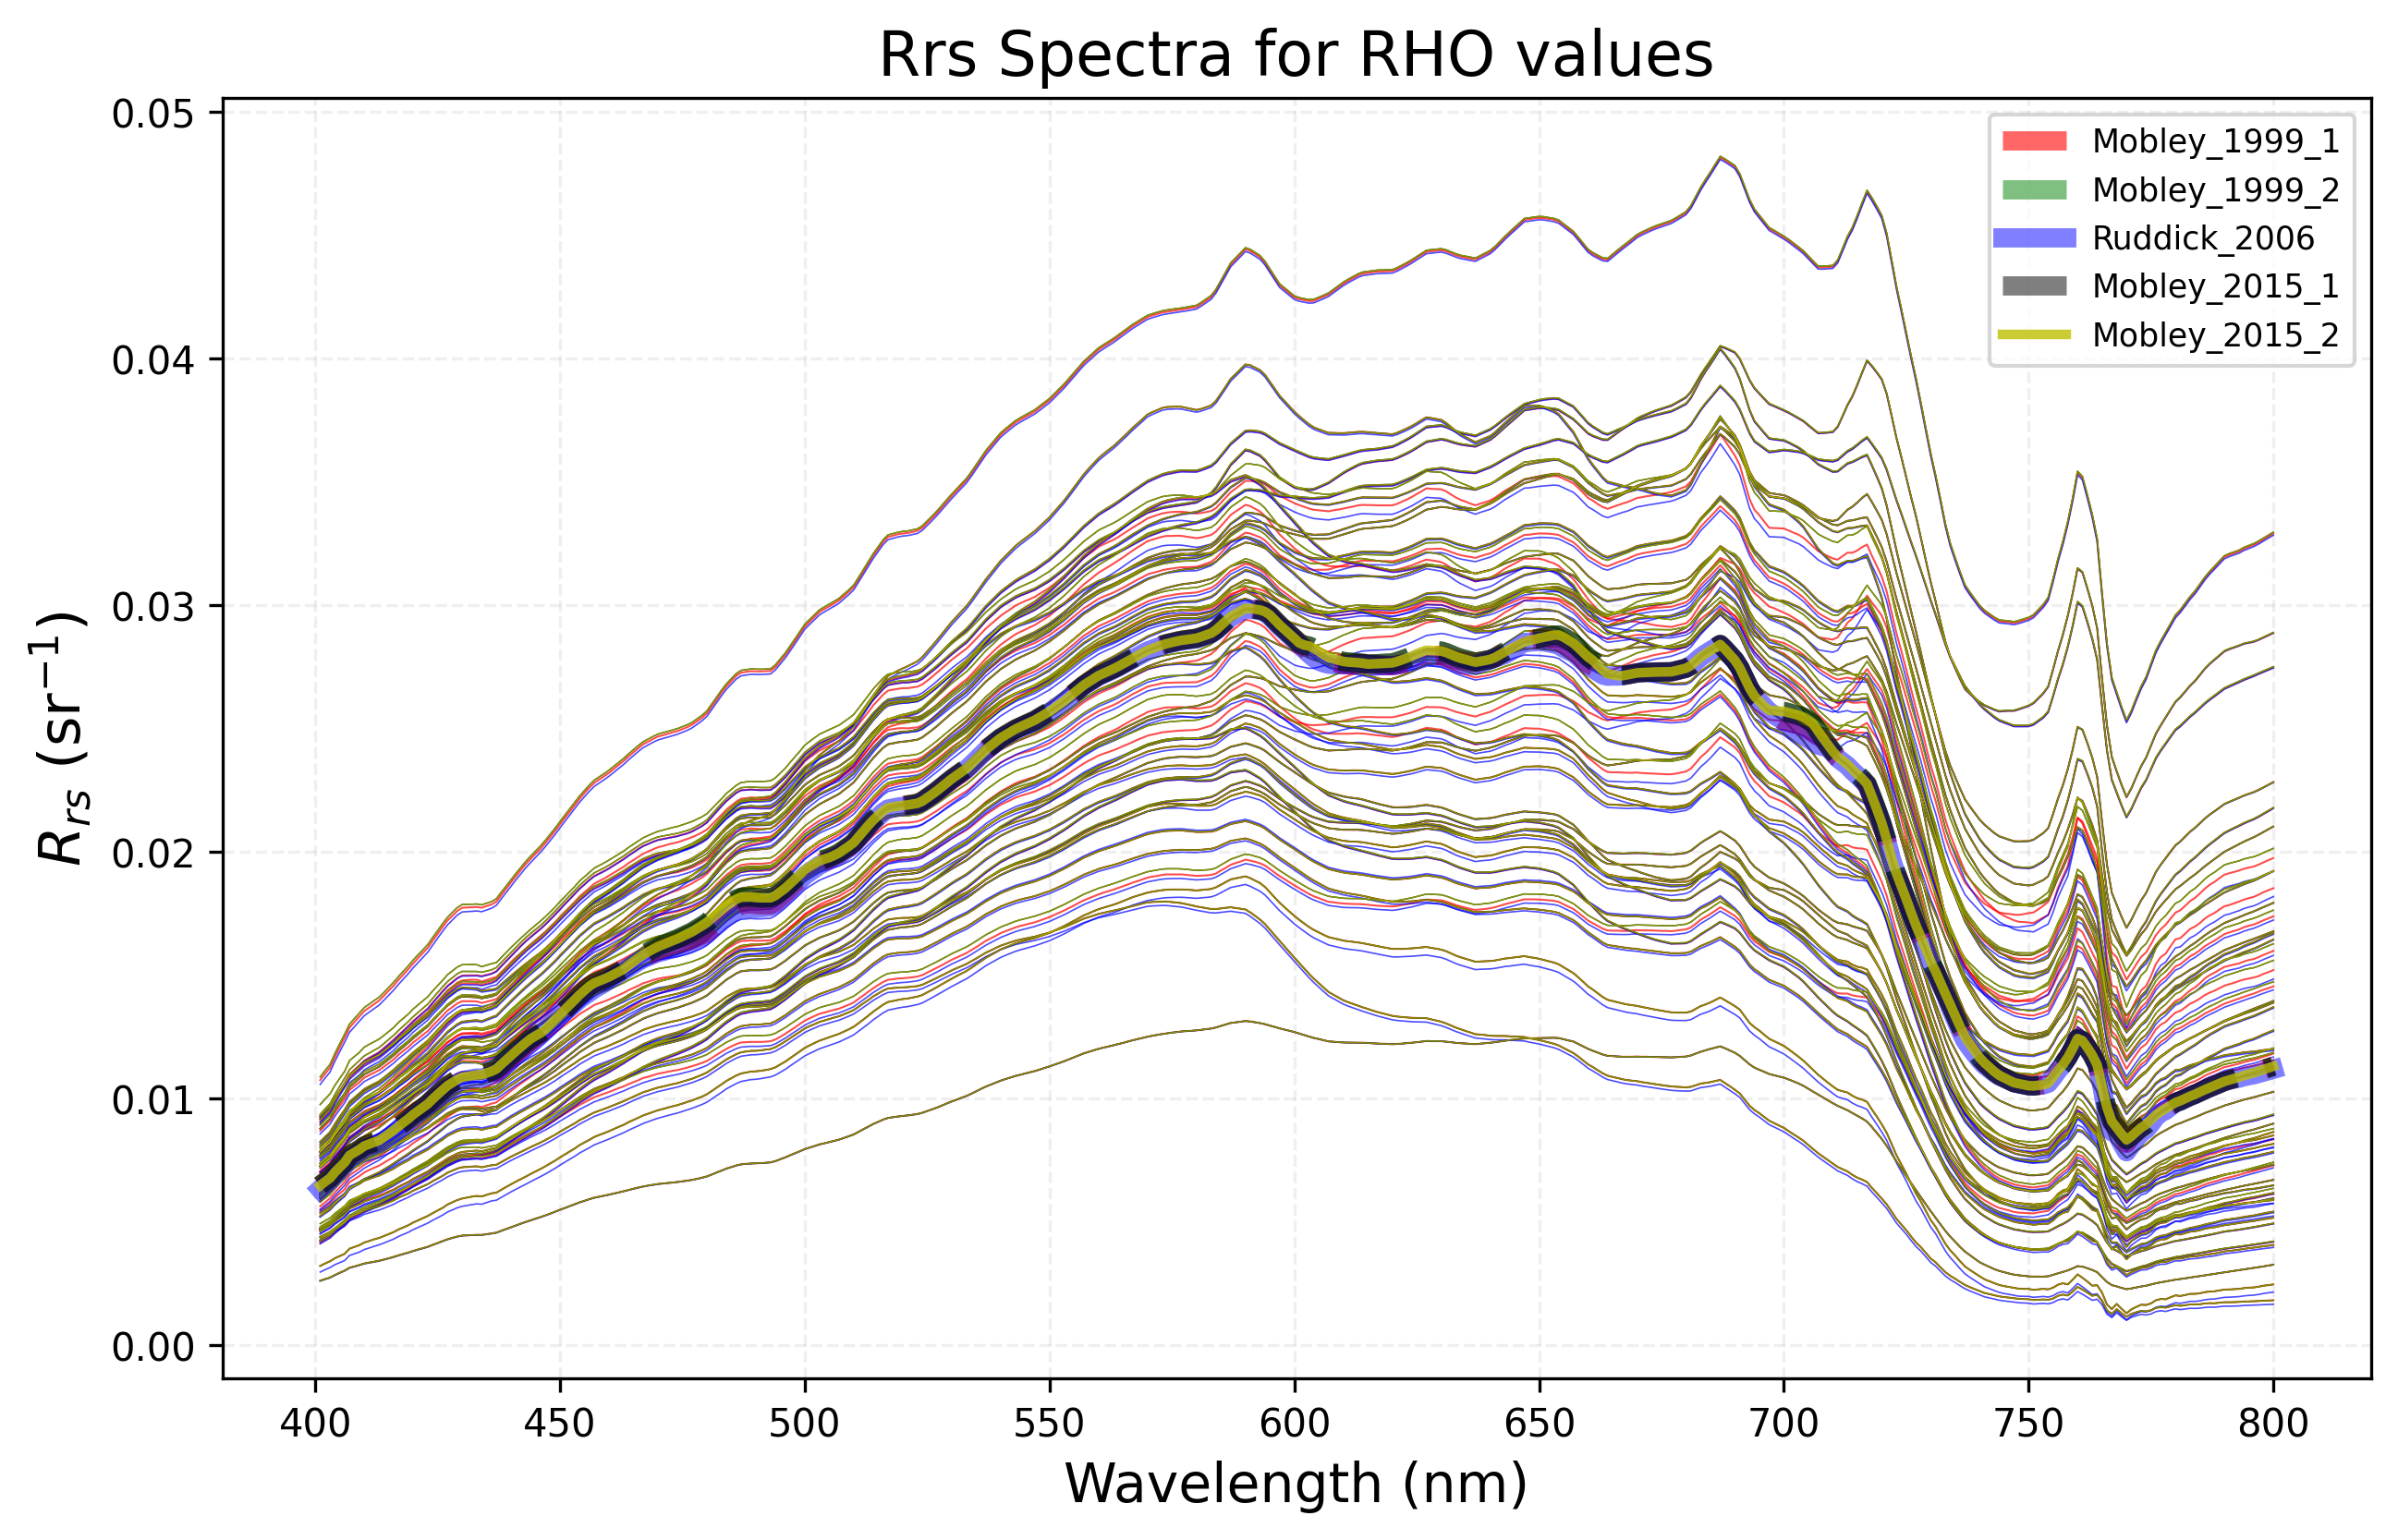

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
file1 = "/isipd/projects/p_CROM-FLUX/script/Rrs_rhos_Mobley_2_plot.csv"
file2 = "/isipd/projects/p_CROM-FLUX/script/Rrs_rhos_Mobley_5_plot.csv"
file3 = "/isipd/projects/p_CROM-FLUX/script/Rrs_rhos_Mobley_1_plot.csv"
file4 = "/isipd/projects/p_CROM-FLUX/script/Rrs_rhos_Mobley_3_plot.csv"
file5 = "/isipd/projects/p_CROM-FLUX/script/Rrs_rhos_Mobley_4_plot.csv"

# Load data and convert to numeric
df1 = pd.read_csv(file1).apply(pd.to_numeric, errors='coerce')
df2 = pd.read_csv(file2).apply(pd.to_numeric, errors='coerce')
df3 = pd.read_csv(file3).apply(pd.to_numeric, errors='coerce')
df4 = pd.read_csv(file3).apply(pd.to_numeric, errors='coerce')
df5 = pd.read_csv(file3).apply(pd.to_numeric, errors='coerce')

# Define wavelength range (400-800 nm)
wavelengths = np.arange(400, 801, 1)

# Ensure data shape matches the wavelength range
if df1.shape[1] != len(wavelengths) or df2.shape[1] != len(wavelengths) or df3.shape[1] != len(wavelengths) or df4.shape[1] != len(wavelengths) or df5.shape[1] != len(wavelengths):
    print(f"Warning: Column count mismatch! df1: {df1.shape[1]}, df2: {df2.shape[1]}, df3: {df3.shape[1]}, df4: {df4.shape[1]}, df5: {df5.shape[1]}")
    exit()

# Compute median spectra
median_spectrum_df1 = df1.median(axis=0)
median_spectrum_df2 = df2.median(axis=0)
median_spectrum_df3 = df3.median(axis=0)
median_spectrum_df4 = df4.median(axis=0)
median_spectrum_df5 = df5.median(axis=0)

# Plot each dataset in different colors
plt.figure(figsize=(10, 6), dpi=300)

for index, row in df1.iterrows():
    plt.plot(wavelengths, row.values, 'r-', alpha=0.7, linewidth=.5)

for index, row in df2.iterrows():
    plt.plot(wavelengths, row.values, 'b-', alpha=0.7, linewidth=.4)

for index, row in df3.iterrows():
    plt.plot(wavelengths, row.values, 'g-', alpha=0.7, linewidth=.35)

for index, row in df4.iterrows():
    plt.plot(wavelengths, row.values, 'k-', alpha=0.7, linewidth=.35)

for index, row in df5.iterrows():
    plt.plot(wavelengths, row.values, 'y-', alpha=0.7, linewidth=.35)

# Overlay median spectra in bold
plt.plot(wavelengths, median_spectrum_df1, 'r--', alpha=0.6, linewidth=5, label="Mobley_1999_1")
plt.plot(wavelengths, median_spectrum_df3, 'g--', alpha=0.5, linewidth=5, label="Mobley_1999_2")
plt.plot(wavelengths, median_spectrum_df2, 'b-', alpha=0.5, linewidth=5, label="Ruddick_2006")
plt.plot(wavelengths, median_spectrum_df4, 'k--', alpha=0.5, linewidth=5, label="Mobley_2015_1")
plt.plot(wavelengths, median_spectrum_df5, 'y-', alpha=0.8, linewidth=2.5, label="Mobley_2015_2")

# Formatting
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("$R_{rs}$ ($\mathregular{sr^{-1}}$)", fontsize=15)
plt.title("Rrs Spectra for RHO values", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.2)

# Add legend
plt.legend(loc="upper right", fontsize="small")

plt.show()
